In [23]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [24]:
iris = load_iris()
type(iris)
print(iris.keys())
type(iris.data), type(iris.target)
iris.data.shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


(150, 4)

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df1 = sns.load_dataset('iris')
print(df1)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


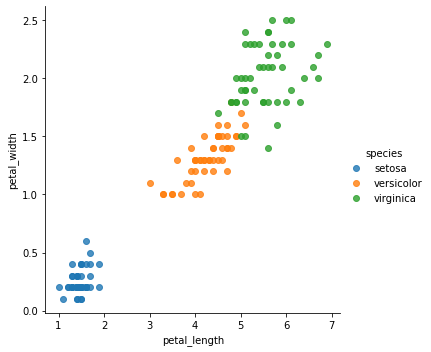

In [27]:
sns.lmplot(x='petal_length', y='petal_width', data=df1, hue='species', fit_reg=False)

#2 Classifiying Data

In [28]:
x = iris.data[:, -2:]
y = iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
x.shape


(150, 2)

**2.1 K-Nearest Neighbor Classifier (K)**

In [29]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(prediction)
print(y_test)
print(knn.score(x_test, y_test))
print(confusion_matrix(y_test, prediction))

[1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
0.9333333333333333
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]


**2.2 Single and Multilayer Neural Network**

In [30]:
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=800)
mlp.fit(x_train,y_train)
pred=mlp.predict(x_test)
mlp.score(x_test,y_test)
print(pred)
print(y_test)
print(mlp.score(x_test, y_test))
print(confusion_matrix(y_test, pred))



[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
0.9666666666666667
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


**2.3Support Vector Machine (SVM)**

In [31]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
pred_svm=clf.predict(x_test)
pred_svm1= np.round_(pred_svm, decimals=0)
print(pred_svm1)
print(y_test)
print(clf.score(x_test,y_test))
confusion_matrix(y_test, pred_svm)

[1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 1 0 0 0 2 2 0]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
0.9


array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  3,  8]])

**2.6Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(x_train, y_train)
pred_logis_reg=clf2.predict(x_test)
print(pred_logis_reg)
print(y_test)
print(clf2.score(x_test, y_test))
print(confusion_matrix(y_test, pred_logis_reg))

[1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
0.9333333333333333
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]


**2.5 Decision Tree and Random Forests**

In [33]:
from sklearn import tree
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(x_train, y_train)
pred_decision_tree = clf3.predict(x_test)
print(pred_decision_tree)
print(y_test)
print(clf3.score(x_test, y_test))
print(confusion_matrix(y_test, pred_decision_tree))

[1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
0.9333333333333333
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators = 140)
clf5.fit(x_train, y_train)
pred_random_forest =clf5.predict(x_test)
print(pred_random_forest)
print(y_test)
print(clf5.score(x_test, y_test))
print(confusion_matrix(y_test, pred_random_forest))

[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
1.0
[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]


**2.6Naïve Bayes Classifier**

In [35]:
from sklearn.naive_bayes import GaussianNB
clf6 = GaussianNB()
clf6.fit(x_train, y_train)
pred_gaussian_nb = clf6.predict(x_test)
print(pred_gaussian_nb)
print(y_test)
print(clf6.score(x_test, y_test))
print(confusion_matrix(y_test, pred_gaussian_nb))

[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
0.9666666666666667
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


# **3. Observe the decision boundary**

**3(a)Generate a test data set with all the points in a 2D grid:**

In [36]:
x = np.linspace(0, 7, 70)
y = np.linspace(0, 3, 30)
xx, yy = np.meshgrid(x, y)
length, width = xx.shape
n_test = length*width
f1 = xx.reshape(n_test, 1)
f2 = yy.reshape(n_test, 1)
test_data = np.concatenate([f1, f2],axis = 1)

**3(b)Predict the class of each data point using a classifier**

**Predict on Logistic Regression**

In [37]:
prd = clf2.predict(test_data)
prd=  np.expand_dims(prd, axis=0)
arrr=np.concatenate((test_data,prd.T), axis =1 )
df5 = pd.DataFrame(arrr)
df5.columns = ['sepal_length', 'sepal_width','species']
print(df5)

      sepal_length  sepal_width  species
0         0.000000          0.0      0.0
1         0.101449          0.0      0.0
2         0.202899          0.0      0.0
3         0.304348          0.0      0.0
4         0.405797          0.0      0.0
...            ...          ...      ...
2095      6.594203          3.0      2.0
2096      6.695652          3.0      2.0
2097      6.797101          3.0      2.0
2098      6.898551          3.0      2.0
2099      7.000000          3.0      2.0

[2100 rows x 3 columns]


**Plot and Decison Boundary on Logistic Regression**

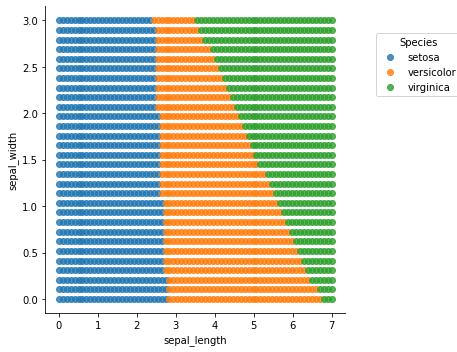

In [38]:
g= sns.lmplot(x='sepal_length', y='sepal_width', data=df5, hue='species',fit_reg=False,facet_kws={'legend_out': True},height=5, aspect=1)
new_labels = ["setosa","versicolor","virginica"]
new_title = 'species'
g._legend.set_title(new_title)
#plt.legend(labels=["setosa","versicolor","virginica"])
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
sns.move_legend(g, "upper left", bbox_to_anchor=(.9, .9), title='Species')

# **4.Tune the hyper-parameters for each classifiers**

**4.1. For KNN**

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from subprocess import check_output
from sklearn import preprocessing
weight_functions = ["uniform", "distance"]
p_values = [1, 2]
n_range = list(range(1, 51))

param_grid = {"n_neighbors": n_range,
              "weights": weight_functions,
              "p": p_values
              }         #setting grid of parameters

grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                    param_grid = param_grid, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    refit = True)   #setting grid with estimator

knn_model = make_pipeline(preprocessing.StandardScaler(), grid)     #creating preprocessing
knn_model.fit(x_train, y_train)       #fitting data

print("The optimal classification Accuracy(Tuned model) is: %.4f" %grid.best_score_)
print("The best tuned parameters are reported below:")
print(grid.best_params_)

The optimal classification Accuracy(Tuned model) is: 0.9750
The best tuned parameters are reported below:
{'n_neighbors': 34, 'p': 2, 'weights': 'uniform'}


**4.2 Single and Multilayer Neural Network**

In [40]:

activation = ["tanh", "relu","logistic"]
solver = ["sgd", "adam","lbfgs"]
hidden_layer_sizes = [(50,50,50), (50,100,50), (100,)]
alpha =[0.01,0.0001]
learning_rate=["constant", "adaptive","invscaling"]

param_grid = {"activation" :activation,
              "solver":solver,
              "hidden_layer_sizes": hidden_layer_sizes,
              "alpha":alpha,
              "learning_rate":learning_rate
              }         #setting grid of parameters

grid = GridSearchCV(estimator = MLPClassifier(max_iter=100), 
                    param_grid = param_grid, 
                    cv = 3, 
                    n_jobs=-1,
                    scoring = 'accuracy', 
                    refit = True)   #setting grid with estimator
import warnings
warnings.filterwarnings("ignore")
mlp_model = make_pipeline(preprocessing.StandardScaler(), grid)     #creating preprocessing
mlp_model.fit(x_train, y_train)       #fitting data

print("The optimal classification Accuracy(Tuned model) is: %.4f" %grid.best_score_)
print("The best tuned parameters are reported below:")
print(grid.best_params_)

The optimal classification Accuracy(Tuned model) is: 0.9667
The best tuned parameters are reported below:
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}


**4.4 Logistic regression**

In [41]:
penalty = ["l1", "l2", "elasricent", "none"]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
max_iter =[100,200,400]
multi_class=["auto", "ovr", "multinomial"]
param_grid = {
              "solver":solver,
              "penalty":penalty,
              "multi_class":multi_class,
              "max_iter":max_iter
              }         #setting grid of parameters

grid = GridSearchCV(estimator = LogisticRegression(), 
                    param_grid = param_grid, 
                    cv = 3, 
                    scoring = 'accuracy', 
                    refit = True)   #setting grid with estimator

regr_model = make_pipeline(preprocessing.StandardScaler(), grid)     #creating preprocessing
regr_model.fit(x_train, y_train)       #fitting data

print("The optimal classification Accuracy(Tuned model) is: %.4f" %grid.best_score_)
print("The best tuned parameters are reported below:")
print(grid.best_params_)

The optimal classification Accuracy(Tuned model) is: 0.9583
The best tuned parameters are reported below:
{'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}


**4.5 Decision Tree**


In [42]:

criteria = ["gini", "entropy"]      #criteria to be tested
min_sample_split_range = [2,10, 20] #min sample split to be tested
max_depth_range = [None, 2, 5, 10]  #max depth to be tested
min_samples_leaf_range = [1, 5, 10] #min samples in the leaf to be tested
min_leaf_nodes_range = [None, 5, 10, 20]    #min leaf nodes to be tested
param_grid = {"criterion": criteria,
              "min_samples_split": min_sample_split_range,
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "max_leaf_nodes": min_leaf_nodes_range
                }
grid = GridSearchCV(estimator=tree.DecisionTreeClassifier(), 
                    param_grid=param_grid, 
                    cv = 5, 
                    scoring='accuracy', 
                    refit=True)  #setting grid with estimat
tree_model = make_pipeline(preprocessing.StandardScaler(), grid)    #creating preprocessing
tree_model.fit(x_train,y_train)      #fitting data

print("The optimal classification Accuracy(Tuned model) is: %.4f" %grid.best_score_)
print(grid.best_params_)

The optimal classification Accuracy(Tuned model) is: 0.9250
{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}



**4.6 Random Forest**

In [43]:
criteria = ["gini", "entropy"]      #criteria to be tested
min_sample_split_range = [2,10, 20] #min sample split to be tested
max_depth_range = [None, 2, 5, 10]  #max depth to be tested
min_samples_leaf_range = [1, 5, 10] #min samples in the leaf to be tested
min_leaf_nodes_range = [None, 5, 10, 20]    #min leaf nodes to be tested
param_grid = {"criterion": criteria,
              "min_samples_split": min_sample_split_range,
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "max_leaf_nodes": min_leaf_nodes_range
                }
grid = GridSearchCV(estimator=RandomForestClassifier(n_estimators = 140), 
                    param_grid=param_grid, 
                    cv = 5, 
                    scoring='accuracy', 
                    refit=True)  #setting grid with estimat
random_forest_model = make_pipeline(preprocessing.StandardScaler(), grid)    #creating preprocessing
random_forest_model.fit(x_train,y_train)      #fitting data

print("The optimal classification Accuracy(Tuned model) is: %.4f" %grid.best_score_)
print("The best tuned parameters are reported below:")
print(grid.best_params_)

The optimal classification Accuracy(Tuned model) is: 0.9500
The best tuned parameters are reported below:
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}


# **5. Perform dimension reduction on Iris dataset using PCA**

In [44]:
from sklearn.preprocessing import StandardScaler
features = df1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaled_features = StandardScaler().fit_transform(features)


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
principalDf_2_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
finalDf_2_pca = pd.concat([principalDf_2_pca, df1[['species']]], axis = 1)
finalDf_2_pca

,principal_component_1,principal_component_2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


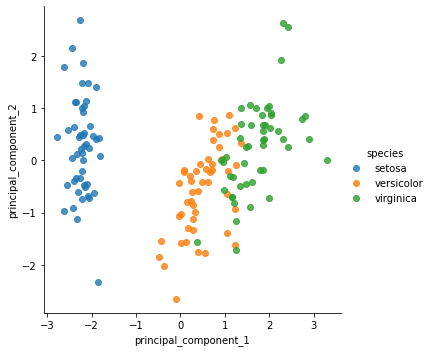

In [46]:
sns.lmplot(x='principal_component_1', y='principal_component_2', data=finalDf_2_pca, hue='species', fit_reg=False)

In [47]:
x= finalDf_2_pca[['principal_component_1','principal_component_2']]
y= finalDf_2_pca[['species']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
print("The accuracy of KNN in after PCA of two principal components")
knn.score(x_test, y_test)

The accuracy of KNN in after PCA of two principal components


0.8333333333333334

In [49]:
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=800)
mlp.fit(x_train,y_train)
print("The accuracy of MLP in after PCA of two principal components")
mlp.score(x_test, y_test)

The accuracy of MLP in after PCA of two principal components


0.8333333333333334

In [50]:
clf = svm.SVC()
clf.fit(x_train, y_train)
print("The accuracy of SVM in after PCA of two principal components")
clf.score(x_test, y_test)

The accuracy of SVM in after PCA of two principal components


0.8333333333333334

In [51]:
svclf  =  make_pipeline(StandardScaler(), SVC(gamma='auto'))
svclf.fit(x_train, y_train)
print("The accuracy of SVM_CVC in after PCA of two principal components")
svclf.score(x_test, y_test)

The accuracy of SVM_CVC in after PCA of two principal components


0.8333333333333334

In [52]:
clf2 = LogisticRegression()
clf2.fit(x_train, y_train)
print("The accuracy of Logistic Regression in after PCA of two principal components")
clf2.score(x_test, y_test)

The accuracy of Logistic Regression in after PCA of two principal components


0.8333333333333334

In [53]:
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(x_train, y_train)
print("The accuracy of Decision Tree in after PCA of two principal components")
clf3.score(x_test, y_test)

The accuracy of Decision Tree in after PCA of two principal components


0.8666666666666667

In [54]:
clf5 = RandomForestClassifier(n_estimators = 140)
clf5.fit(x_train, y_train)
print("The accuracy of Decision Tree in after Random Forrest of two principal components")
clf5.score(x_test, y_test)

The accuracy of Decision Tree in after Random Forrest of two principal components


0.8333333333333334